In [561]:
import numpy as np
import pandas as pd
from enum import Enum

import matplotlib.pyplot as plt
from math import sqrt, log, exp, pi
from scipy.stats import gmean, kurtosis

In [36]:
def normal_sample(N, k=1, random_state=None):
    np.random.seed(random_state)
    return np.random.normal(0, 1, size=(k, N))

def brownian_motion(T, N, k=1, random_state=None):
    dW = normal_sample(N, k, random_state) * sqrt (T / N)
    return np.insert(dW.cumsum(axis=1), 0, 0, 1)

def GBM(T, N, mu, sigma, S_0, k=1, random_state=None):
    time = np.linspace(0, T, N+1)
    W = brownian_motion(T, N, k, random_state)
    S = S_0 * np.exp((mu - (sigma ** 2) / 2) * time + sigma * W)
    return (S)

def GBM_EM(T, N, mu, sigma, S_0, k=1, random_state=None):
    dt = T / N
    time = np.linspace(0, T, N+1)
    dW = normal_sample(N, k, random_state) * sqrt (T / N)
    S = np.zeros((k, N+1))
    S[:,0] = S_0
    for n in range(N):
        S[:,n+1] = S[:, n] + mu * S[:, n] * dt + S[:, n] * sigma * dW[:, n]
    return (S)

def GBM_M(T, N, mu, sigma, S_0, k=1, random_state=None):
    dt = T / N
    time = np.linspace(0, T, N+1)
    dW = normal_sample(N, k, random_state) * sqrt (T / N)
    S = np.zeros((k, N+1))
    S[:,0] = S_0
    for n in range(N):
        S[:,n+1] = S[:, n] + mu * S[:, n] * dt + S[:, n] * sigma * dW[:, n] + \
        0.5 * (sigma ** 2) * S[:, n] * (dW[:, n]**2 - dt)
    return (S)

In [632]:
def bsm_value(S, K, T, r, q, sigma, Flag):
    from math import log, sqrt, exp
    from scipy import stats

    S = float(S)
    K = float(K)
    d1 = (log(S/K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S/K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    if Flag == 0:
        value = (S * exp(-q * T) * stats.norm.cdf(d1, 0.0, 1.0) -
                 K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    elif Flag == 1:
        value = (K * exp(-r * T) * stats.norm.cdf(-d2, 0.0, 1.0) -
                 S * exp(-q * T) * stats.norm.cdf(-d1, 0.0, 1.0))
    else:
        value = 'NaN'
    return value

def tw_asian_value(S, K, T, t1, r, sigma, Flag):
    T2 = T - t1
    tau = -t1
    if r == 0: 
        M1 = 1
        M2 = 2 * exp(T * sigma ** 2) / ((sigma ** 4) * ((T - t1) ** 2)) - \
        2 * exp(t1 * sigma ** 2) * (1 + (T - t1) * sigma ** 2) / ((sigma ** 4) * (T - t1) ** 2)
    else: 
        M1 = (exp(r * T) - exp(r * t1)) / (r * (T - t1))
        M2 = 2 * exp(T * (2 * r + sigma ** 2)) / \
        ((r + sigma ** 2) * (2 * r + sigma ** 2) * (T - t1) ** 2) + \
        2 * exp(t1 * (2 * r + sigma ** 2)) * \
        ((1 / (2 * r + sigma ** 2)) - exp(r * (T - t1)) / (r + sigma ** 2)) / \
        (r * (T - t1) ** 2)
    q = r - log(M1) / T
    v = sqrt((log(M2) / T) - 2 * log(M1) / T)
    return bsm_value(S, K, T, r, q, v, Flag)
    

In [623]:
T = 1
sigma = 0.2
r = 0.05
t1 = 0
M2 = 2 * exp(T * (2 * r + sigma ** 2)) / \
        ((r + sigma ** 2) * (2 * r + sigma ** 2) * (T - t1) ** 2) + \
        2 * exp(t1 * (2 * r + sigma ** 2)) * \
        ((1 / (2 * r + sigma ** 2)) - exp(r * (T - t1)) / (b + sigma ** 2)) / \
        (r * (T - t1) ** 2)

In [631]:
exp(r * (T - t1)) / (b + sigma ** 2)

array([13.1408887 , 11.89220697, 10.77122025,  9.77017748,  8.87897885,
        8.08670074,  7.38252174,  6.75624098,  6.19853241, 26.28177741,
       26.28177741])

In [633]:
tw_asian_value(100, 100, 1, 0, 0.05, 0.2, 0)

5.782838338051683

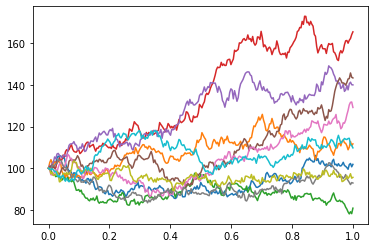

In [425]:
simulations = GBM(1, 252, 0.05, 0.2, 100, 10, random_state=42).T
plt.plot(np.linspace(0,1,253), simulations)
plt.show()

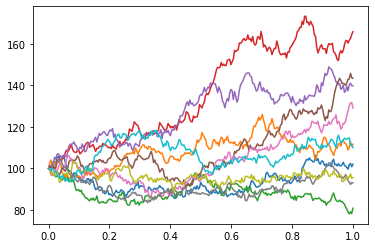

In [426]:
simulations = GBM_EM(1, 252, 0.05, 0.2, 100, 10, random_state=42).T
plt.plot(np.linspace(0,1,253), simulations)
plt.show()

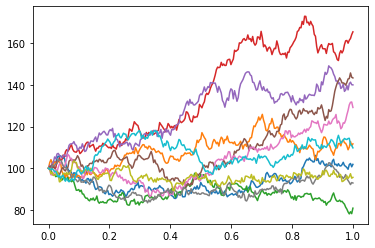

In [427]:
simulations = GBM_M(1, 252, 0.05, 0.2, 100, 10, random_state=42).T
plt.plot(np.linspace(0,1,253), simulations)
plt.show()

In [528]:
simulations_cf = GBM(1, 252, 0.05, 0.2, 100, 100000, random_state=42).T
simulations_em = GBM_EM(1, 252, 0.05, 0.2, 100, 100000, random_state=42).T
simulations_m = GBM_M(1, 252, 0.05, 0.2, 100, 100000, random_state=42).T

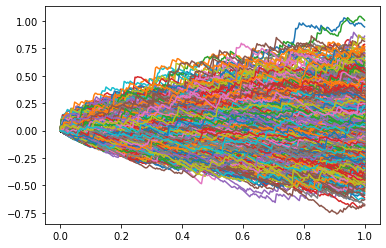

In [436]:
plt.plot(np.linspace(0,1,253), simulations_cf - simulations_em)
plt.show()

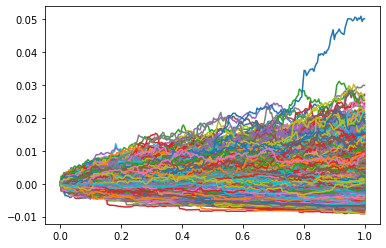

In [437]:
plt.plot(np.linspace(0,1,253), simulations_cf - simulations_m)
plt.show()

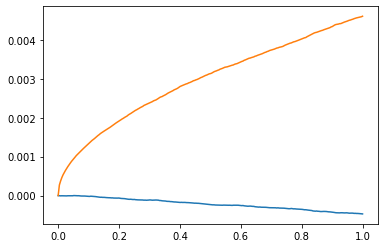

In [438]:
plt.plot(np.linspace(0,1,253),(simulations_m - simulations_cf).mean(axis=1))
plt.plot(np.linspace(0,1,253),(simulations_m - simulations_cf).std(axis=1))
plt.show()

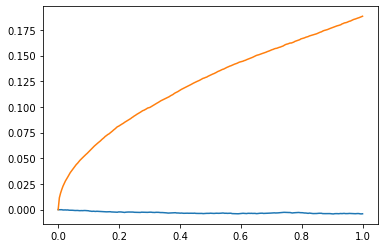

In [439]:
plt.plot(np.linspace(0,1,253),(simulations_em - simulations_cf).mean(axis=1))
plt.plot(np.linspace(0,1,253),(simulations_em - simulations_cf).std(axis=1))
plt.show()

In [440]:
%timeit GBM(1, 252, 0.2, 0.2, 100, 1, random_state=42)
%timeit GBM_M(1, 252, 0.2, 0.2, 100, 1, random_state=42)
%timeit GBM_EM(1, 252, 0.2, 0.2, 100, 1, random_state=42)

96.4 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.66 ms ± 46.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.51 ms ± 82.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [641]:
class OptionType(Enum):
    CALL = 0
    PUT = 1
    
class StrikeType(Enum):
    FIXED = 0
    FLOATING = 1

class SamplingType(Enum):
    DISCRETE = 0
    CONTINUOUS = 1

class AverageType(Enum):
    ARITHMETIC = 0
    GEOMETRIC = 1
    
class AsianOption:
    def __init__(self, option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity,
                 sampling_freq = None, strike_price=None):
        self.option_type = option_type
        self.strike_type = strike_type
        self.sampling_type = sampling_type
        self.average_type = average_type
        self.averaging_period_start = averaging_period_start
        self.time_to_maturity = time_to_maturity
        self.sampling_freq = sampling_freq
        self.strike_price = strike_price
        
    def get_average(self, hist_prices):
        n = len(hist_prices) - 1
        start = int(n * (averaging_period_start / time_to_maturity))
        averaging_period_prices = hist_prices[start:]
        if self.sampling_type == SamplingType.DISCRETE:
            if self.sampling_freq == None:
                raise ValueError("Sampling frequency must be specified for discrete averaging option")
            else:
                k = int( n * self.sampling_freq / self.time_to_maturity)
                #sampling = list(range(0, len(averaging_period_prices), k))
                if self.average_type == AverageType.ARITHMETIC:
                    #average_price = np.mean(averaging_period_prices[sampling])
                    average_price = np.mean(averaging_period_prices[::k])
                else:
                    #average_price = np.exp(np.mean(np.log(averaging_period_prices[sampling])))
                    #average_price = np.exp(np.mean(np.log(averaging_period_prices[::k])))
                    average_price = gmean(averaging_period_prices[::k])
        else:
            if self.average_type == AverageType.ARITHMETIC:
                average_price = np.mean(averaging_period_prices)
            else:
                #average_price = np.exp(np.mean(np.log(averaging_period_prices)))
                average_price = gmean(averaging_period_prices)
        return average_price
    
    def get_payoff(self, hist_prices):
        average_price = self.get_average(hist_prices)
        if self.strike_type == StrikeType.FIXED:
            if self.strike_price is None:
                raise ValueError("Strike price must be specified for fixed strike option")
            else:
                if self.option_type == OptionType.CALL:
                    payoff = max(average_price - self.strike_price, 0)
                else:
                    payoff = max(self.strike_price - average_price, 0)
        else:
            if self.option_type == OptionType.CALL:
                payoff = max(hist_prices[-1] - average_price, 0)
            else:
                payoff = max(average_price - hist_prices[-1], 0)
        return payoff
    
    def get_sim_mean(self, simulations):
        payoffs = []
        for i in range(simulations.shape[1]):
            payoffs.append(self.get_payoff(simulations[:,i]))
        return np.array(payoffs).mean()
    
    def get_mc_value(self, S, r, sigma, N, k=10000, random_state=None):
        T = self.time_to_maturity
        simulations_em = GBM_EM(T, N, r, sigma, S, k, random_state=random_state).T
        return exp(-r * T) * self.get_sim_mean(simulations_em)
    
    #def get_mc_value(self, S, r, sigma, N, k=10000, random_state=None):
    #    T = self.time_to_maturity
    #    simulations_em = GBM_EM(T, N, r, sigma, S, k, random_state=random_state).T
    #    payoffs = []
    #    for i in range(simulations_em.shape[1]):
    #        payoffs.append(self.get_payoff(simulations_em[:,i]))
    #    return np.array(payoffs).mean() * exp(-r * T)

In [516]:
option_type = OptionType.CALL
strike_type = StrikeType.FIXED
average_type = AverageType.ARITHMETIC
sampling_type = SamplingType.CONTINUOUS 
averaging_period_start = 1
time_to_maturity = 1

option = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity,
                    strike_price=100)

In [529]:
option_type = OptionType.CALL
strike_type = StrikeType.FIXED
average_type = AverageType.ARITHMETIC
sampling_type = SamplingType.CONTINUOUS 
averaging_period_start = 0
time_to_maturity = 1

option = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity,
                    strike_price=100)

In [530]:
payoffs = []
payoffs_vanilla = []
for i in range(simulations_em.shape[1]):
    payoffs.append(option.get_payoff(simulations_em[:,i]))
    payoffs_vanilla.append(max(simulations_em[-1,i] - 100, 0))

In [532]:
np.array(payoffs).mean() * exp(-0.05)

5.736372424299407

In [531]:
np.array(payoffs_vanilla).mean() * exp(-0.05)

10.3987339785873

In [520]:
bsm_value(100, 100, 1, 0.05, 0, 0.2, 0)

10.450583572185565

In [534]:
option.get_average(simulations_cf[:,0])

93.62526034736517

In [635]:
option_type = OptionType.CALL
strike_type = StrikeType.FIXED
average_type = AverageType.GEOMETRIC
sampling_type = SamplingType.CONTINUOUS 
averaging_period_start = 0
time_to_maturity = 1

option1 = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity, sampling_freq,
                    strike_price=100)

option_type = OptionType.PUT
strike_type = StrikeType.FLOATING

option2 = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity, sampling_freq,
                    strike_price=1)

print(option1.get_mc_value(100, 0, 0.2, 252, 100000, 42), option2.get_mc_value(100, 0, 0.2, 252, 100000, 42))

4.403333215863155 4.398205289472838


In [ ]:
option_type = OptionType.CALL
strike_type = StrikeType.FIXED
average_type = AverageType.ARITHMETIC
sampling_type = SamplingType.CONTINUOUS 
averaging_period_start = 0.5
sampling_freq = 0.25
time_to_maturity = 1

option = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity, sampling_freq,
                    strike_price=100)

In [642]:
option_types = [OptionType.CALL, OptionType.PUT]
strike_types = [StrikeType.FIXED, StrikeType.FLOATING]
average_types = [AverageType.ARITHMETIC, AverageType.GEOMETRIC]
sampling_types = [SamplingType.CONTINUOUS, SamplingType.DISCRETE]
all_types = [(t1, t2, t3, t4) for t1 in option_types for t2 in strike_types for t3 in average_types
             for t4 in sampling_types]
averaging_period_start = 0
sampling_freq = 0.25
time_to_maturity = 1
output_table = pd.DataFrame(columns=['Option Type', 'Strike Type', 'Average Type',
                                    'Sampling Type', 'Time to Maturity', 'Strike',
                                    'Sampling Frequency', 'Averaging Period Start',
                                    'Monte Carlo Price'])
for t in all_types:
    (option_type, strike_type, average_type, sampling_type) = t
    option = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity, sampling_freq,
                    strike_price=100)
    value = option.get_mc_value(100, 0.05, 0.2, 252, 100000, 42)
    new_row = {'Option Type' : str(option_type).split('.')[1],
              'Strike Type' : str(strike_type).split('.')[1],
              'Average Type' : str(average_type).split('.')[1],
              'Sampling Type' : str(sampling_type).split('.')[1],
              'Time to Maturity' : time_to_maturity,
              'Strike' : 100,
              'Sampling Frequency' : sampling_freq,
              'Averaging Period Start' : averaging_period_start,
              'Monte Carlo Price' : value}
    output_table = output_table.append(new_row, ignore_index=True)
    print(t, value)

(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.ARITHMETIC: 0>, <SamplingType.CONTINUOUS: 1>) 5.736372424299407
(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.ARITHMETIC: 0>, <SamplingType.DISCRETE: 0>) 5.530042034266332
(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.GEOMETRIC: 1>, <SamplingType.CONTINUOUS: 1>) 5.520932447723799
(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.GEOMETRIC: 1>, <SamplingType.DISCRETE: 0>) 5.265894901736886
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.ARITHMETIC: 0>, <SamplingType.CONTINUOUS: 1>) 5.841540417676416
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.ARITHMETIC: 0>, <SamplingType.DISCRETE: 0>) 5.603072235837109
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.GEOMETRIC: 1>, <SamplingType.CONTINUOUS: 1>) 6.049559593136579
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.GEOMETRIC: 1>, <SamplingType.DISCRETE: 0>) 5.861108322732776
(<OptionType.PUT

In [606]:
option_types = [OptionType.CALL, OptionType.PUT]
strike_types = [StrikeType.FIXED, StrikeType.FLOATING]
average_types = [AverageType.ARITHMETIC, AverageType.GEOMETRIC]
sampling_types = [SamplingType.CONTINUOUS, SamplingType.DISCRETE]
all_types = [(t1, t2, t3, t4) for t1 in option_types for t2 in strike_types for t3 in average_types
             for t4 in sampling_types]

In [607]:
averaging_period_start = 0
sampling_freq = 0.25
time_to_maturity = 1
output_table = pd.DataFrame(columns=['Option Type', 'Strike Type', 'Average Type',
                                    'Sampling Type', 'Time to Maturity', 'Strike',
                                    'Sampling Frequency', 'Averaging Period Start',
                                    'Monte Carlo Price'])
for t in all_types:
    (option_type, strike_type, average_type, sampling_type) = t
    option = AsianOption(option_type, strike_type, sampling_type, average_type, 
                 averaging_period_start, time_to_maturity, sampling_freq,
                    strike_price=100)
    payoffs = []
    payoffs_vanilla = []
    for i in range(simulations_em.shape[1]):
        payoffs.append(option.get_payoff(simulations_em[:,i]))
        payoffs_vanilla.append(max(simulations_em[-1,i] - 100, 0))
    new_row = {'Option Type' : str(option_type).split('.')[1],
              'Strike Type' : str(strike_type).split('.')[1],
              'Average Type' : str(average_type).split('.')[1],
              'Sampling Type' : str(sampling_type).split('.')[1],
              'Time to Maturity' : time_to_maturity,
              'Strike' : 100,
              'Sampling Frequency' : sampling_freq,
              'Averaging Period Start' : averaging_period_start,
              'Monte Carlo Price' : np.array(payoffs).mean() * exp(-0.05)}
    output_table = output_table.append(new_row, ignore_index=True)
    print(t, np.array(payoffs).mean() * exp(-0.05))

(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.ARITHMETIC: 0>, <SamplingType.CONTINUOUS: 1>) 5.736372424299407
(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.ARITHMETIC: 0>, <SamplingType.DISCRETE: 0>) 5.530042034266332
(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.GEOMETRIC: 1>, <SamplingType.CONTINUOUS: 1>) 5.520932447723799
(<OptionType.CALL: 0>, <StrikeType.FIXED: 0>, <AverageType.GEOMETRIC: 1>, <SamplingType.DISCRETE: 0>) 5.265894901736886
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.ARITHMETIC: 0>, <SamplingType.CONTINUOUS: 1>) 5.841540417676416
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.ARITHMETIC: 0>, <SamplingType.DISCRETE: 0>) 5.603072235837109
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.GEOMETRIC: 1>, <SamplingType.CONTINUOUS: 1>) 6.049559593136579
(<OptionType.CALL: 0>, <StrikeType.FLOATING: 1>, <AverageType.GEOMETRIC: 1>, <SamplingType.DISCRETE: 0>) 5.861108322732776
(<OptionType.PUT

In [576]:
output_table.style.hide_index()

Option Type,Strike Type,Average Type,Sampling Type,Time to Maturity,Strike,Sampling Frequency,Averaging Period Start,Monte Carlo Price
CALL,FIXED,ARITHMETIC,CONTINUOUS,1,100,0.250000,0,5.736372
CALL,FIXED,ARITHMETIC,DISCRETE,1,100,0.250000,0,5.530042
CALL,FIXED,GEOMETRIC,CONTINUOUS,1,100,0.250000,0,5.520932
CALL,FIXED,GEOMETRIC,DISCRETE,1,100,0.250000,0,5.265895
CALL,FLOATING,ARITHMETIC,CONTINUOUS,1,100,0.250000,0,5.841540
CALL,FLOATING,ARITHMETIC,DISCRETE,1,100,0.250000,0,5.603072
CALL,FLOATING,GEOMETRIC,CONTINUOUS,1,100,0.250000,0,6.049560
CALL,FLOATING,GEOMETRIC,DISCRETE,1,100,0.250000,0,5.861108
PUT,FIXED,ARITHMETIC,CONTINUOUS,1,100,0.250000,0,3.357600
PUT,FIXED,ARITHMETIC,DISCRETE,1,100,0.250000,0,3.135388


In [610]:
output_table.style.hide_index()

Option Type,Strike Type,Average Type,Sampling Type,Time to Maturity,Strike,Sampling Frequency,Averaging Period Start,Monte Carlo Price
CALL,FIXED,ARITHMETIC,CONTINUOUS,1,100,0.250000,0,5.736372
CALL,FIXED,ARITHMETIC,DISCRETE,1,100,0.250000,0,5.530042
CALL,FIXED,GEOMETRIC,CONTINUOUS,1,100,0.250000,0,5.520932
CALL,FIXED,GEOMETRIC,DISCRETE,1,100,0.250000,0,5.265895
CALL,FLOATING,ARITHMETIC,CONTINUOUS,1,100,0.250000,0,5.841540
CALL,FLOATING,ARITHMETIC,DISCRETE,1,100,0.250000,0,5.603072
CALL,FLOATING,GEOMETRIC,CONTINUOUS,1,100,0.250000,0,6.049560
CALL,FLOATING,GEOMETRIC,DISCRETE,1,100,0.250000,0,5.861108
PUT,FIXED,ARITHMETIC,CONTINUOUS,1,100,0.250000,0,3.357600
PUT,FIXED,ARITHMETIC,DISCRETE,1,100,0.250000,0,3.135388


In [681]:
K = 100
sigma = 0.2
r = 0.05
S_0 = 100

S_space = np.linspace(51, 150, 100)
values_S_calls = []
values_S_puts = []
values_S_vanilla_calls = []
values_S_vanilla_puts = []

K_space = np.linspace(51, 150, 100)
values_K_calls = []
values_K_puts = []
values_K_vanilla_calls = []
values_K_vanilla_puts = []

r_space = np.linspace(0.005, 0.1, 20)
values_r_calls = []
values_r_puts = []
values_r_vanilla_calls = []
values_r_vanilla_puts = []

days_space = np.linspace(21, 501, 97)
values_days_calls = []
values_days_puts = []
values_days_vanilla_calls = []
values_days_vanilla_puts = []

sigma_space = np.linspace(0.11, 0.3, 20)
values_sigma_calls = []
values_sigma_puts = []
values_sigma_vanilla_calls = []
values_sigma_vanilla_puts = []

time_to_maturity = 1
option_type = OptionType.CALL
strike_type = StrikeType.FIXED
average_type = AverageType.ARITHMETIC
sampling_type = SamplingType.CONTINUOUS 
averaging_period_start = 0

option = AsianOption(option_type, strike_type, sampling_type, average_type,
                     averaging_period_start, time_to_maturity, strike_price=K)
for S in S_space: values_S.append(option.get_mc_value(S, r, sigma, 252, 10000, 42))
for rate in r_space: values_r.append(option.get_mc_value(S_0, rate, sigma, 252, 10000, 42))
for vol in sigma_space: values_sigma.append(option.get_mc_value(S_0, r, vol, 252, 10000, 42))
for strike in K_space:
    option = AsianOption(option_type, strike_type, sampling_type, average_type,
                     averaging_period_start, time_to_maturity, strike_price=strike)
    values_K.append(option.get_mc_value(S_0, r, sigma, 252, 10000, 42))
for days in days_space:
    option = AsianOption(option_type, strike_type, sampling_type, average_type,
                     averaging_period_start, days / 252, strike_price=K)
    values_days.append(option.get_mc_value(S_0, r, sigma, int(days), 10000, 42))

In [709]:
K = 100
sigma = 0.2
r = 0.05
S_0 = 100
N = 252
T = 1

S_space = np.linspace(51, 150, 100)
values_S_calls = []
values_S_puts = []
values_S_vanilla_calls = []
values_S_vanilla_puts = []

K_space = np.linspace(51, 150, 100)
values_K_calls = []
values_K_puts = []
values_K_vanilla_calls = []
values_K_vanilla_puts = []

r_space = np.linspace(0.005, 0.1, 20)
values_r_calls = []
values_r_puts = []
values_r_vanilla_calls = []
values_r_vanilla_puts = []

days_space = np.linspace(21, 501, 97)
values_days_calls = []
values_days_puts = []
values_days_vanilla_calls = []
values_days_vanilla_puts = []

sigma_space = np.linspace(0.11, 0.3, 20)
values_sigma_calls = []
values_sigma_puts = []
values_sigma_vanilla_calls = []
values_sigma_vanilla_puts = []


strike_type = StrikeType.FIXED
average_type = AverageType.ARITHMETIC
sampling_type = SamplingType.CONTINUOUS 
averaging_period_start = 0

call_option = AsianOption(OptionType.CALL, strike_type, sampling_type, average_type,
                     averaging_period_start, T, strike_price=K)
put_option = AsianOption(OptionType.PUT, strike_type, sampling_type, average_type,
                     averaging_period_start, T, strike_price=K)
for S in S_space:
    simulations = GBM_EM(T, N, r, sigma, S, 10000, random_state=42).T
    values_S_calls.append(exp(-r * T) * call_option.get_sim_mean(simulations))
    values_S_puts.append(exp(-r * T) * put_option.get_sim_mean(simulations))
    values_S_vanilla_calls.append(bsm_value(S, K, T, r, 0, sigma, 0))
    values_S_vanilla_puts.append(bsm_value(S, K, T, r, 0, sigma, 1))
for rate in r_space: 
    simulations = GBM_EM(T, N, rate, sigma, S_0, 10000, random_state=42).T
    values_r_calls.append(exp(-rate * T) * call_option.get_sim_mean(simulations))
    values_r_puts.append(exp(-rate * T) * put_option.get_sim_mean(simulations))
    values_r_vanilla_calls.append(bsm_value(S_0, K, T, rate, 0, sigma, 0))
    values_r_vanilla_puts.append(bsm_value(S_0, K, T, rate, 0, sigma, 1))
for vol in sigma_space:
    simulations = GBM_EM(T, N, r, vol, S_0, 10000, random_state=42).T
    values_sigma_calls.append(exp(-r * T) * call_option.get_sim_mean(simulations))
    values_sigma_puts.append(exp(-r * T) * put_option.get_sim_mean(simulations))
    values_sigma_vanilla_calls.append(bsm_value(S_0, K, T, r, 0, vol, 0))
    values_sigma_vanilla_puts.append(bsm_value(S_0, K, T, r, 0, vol, 1))
simulations = GBM_EM(T, N, r, sigma, S_0, 10000, random_state=42).T
for strike in K_space:
    call_option = AsianOption(OptionType.CALL, strike_type, sampling_type, average_type,
                     averaging_period_start, T, strike_price=strike)
    put_option = AsianOption(OptionType.PUT, strike_type, sampling_type, average_type,
                     averaging_period_start, T, strike_price=strike)
    values_K_calls.append(exp(-r * T) * call_option.get_sim_mean(simulations))
    values_K_puts.append(exp(-r * T) * put_option.get_sim_mean(simulations))
    values_K_vanilla_calls.append(bsm_value(S_0, strike, T, r, 0, sigma, 0))
    values_K_vanilla_puts.append(bsm_value(S_0, strike, T, r, 0, sigma, 1))
simulations = GBM_EM(2, 504, r, sigma, S_0, 10000, random_state=42).T
for days in days_space:
    call_option = AsianOption(OptionType.CALL, strike_type, sampling_type, average_type,
                     averaging_period_start, days / 252, strike_price=K)
    put_option = AsianOption(OptionType.PUT, strike_type, sampling_type, average_type,
                     averaging_period_start, days / 252, strike_price=K)
    values_days_calls.append(exp(-r * (days / 252)) * call_option.get_sim_mean(simulations[:int(days)]))
    values_days_puts.append(exp(-r * (days / 252)) * put_option.get_sim_mean(simulations[:int(days)]))
    values_days_vanilla_calls.append(bsm_value(S_0, K, (days / 252), r, 0, sigma, 0))
    values_days_vanilla_puts.append(bsm_value(S_0, K, (days / 252), r, 0, sigma, 1))

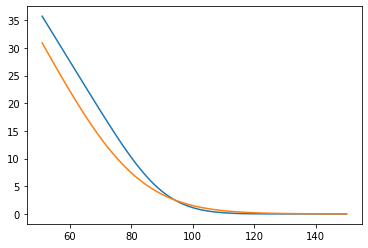

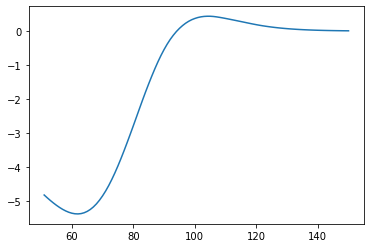

In [708]:
plt.plot(S_space, values_S_puts)
plt.plot(S_space, values_S_vanilla_puts)
plt.show()
plt.plot(S_space, np.array(values_S_vanilla_puts) - np.array(values_S_puts))
plt.show()

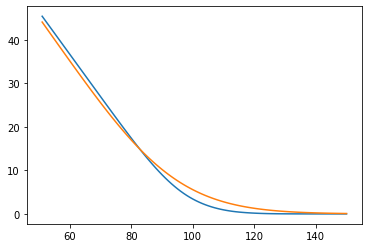

In [710]:
plt.plot(S_space, values_S_puts)
plt.plot(S_space, values_S_vanilla_puts)
plt.show()

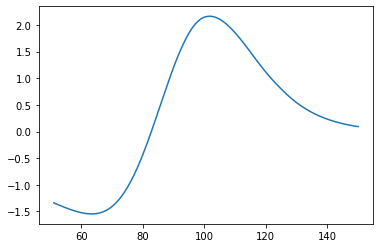

In [705]:
plt.plot(S_space, np.array(values_S_vanilla_puts) - np.array(values_S_puts))
plt.show()

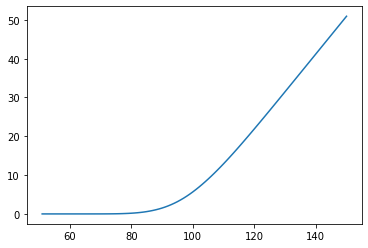

In [640]:
plt.plot(S_space, values_S)
plt.show()

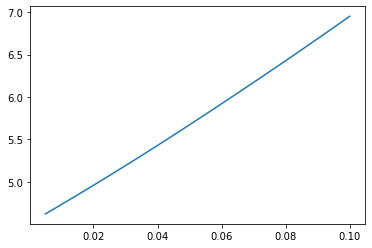

In [670]:
plt.plot(r_space, values_r)
plt.show()

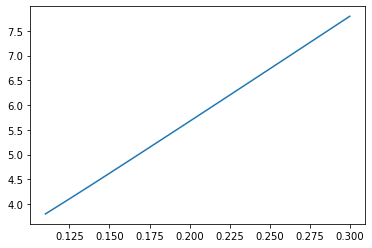

In [676]:
plt.plot(sigma_space, values_sigma)
plt.show()

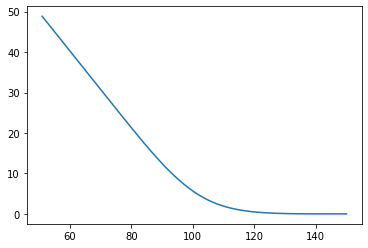

In [682]:
plt.plot(K_space, values_K)
plt.show()

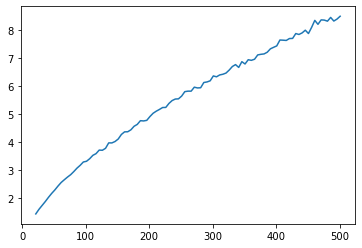

In [683]:
plt.plot(days_space, values_days)
plt.show()

In [608]:
option.get_mc_value(100, 0.05, 0.2, 252, 100000, 42)

3.0069037740651012

In [600]:
bsm_value(100, 100, 1, 0.05, 0.05 - 0.5 * (0.05 - (0.2 ** 2) / 6), 0.2 / sqrt(3), 0)
bsm_value(100, 100, 1, 0.05, 0.05 - 0.5 * (0.05 - (0.2 ** 2) / 6), 0.2 / sqrt(3), 1)

3.46333194773856

In [538]:
np.exp(np.mean(np.log(simulations_cf[:,0])))

93.45524603351826

In [554]:
print(str(option_type).split('.')[1])

PUT


In [560]:
for typ in t:
    print(str(typ).split('.')[1], end='\t')

PUT	FLOATING	GEOMETRIC	DISCRETE	

In [539]:
gmean(simulations_cf[:,0])

93.45524603351826

In [361]:
option.get_average(list(range(7)))

4.5

In [307]:
hist_prices = list(range(11))
n = len(hist_prices) -  1
start = int(n * (averaging_period_start / time_to_maturity))

In [308]:
hist_prices[start:]

[5, 6, 7, 8, 9, 10]

In [309]:
start

5

In [324]:
k = int( n * sampling_freq / time_to_maturity)

In [325]:
k

2

In [328]:
sampling = list(range(0, len(hist_prices[start:])+1, k))

In [753]:
((simulations[-1,:] - 100) * (simulations[-1,:] > 100)).mean()

17.577605315301934

In [269]:
list(range(11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [251]:
list(range(len(hist_prices[start:])-1, -1, -k))

[4, 2, 0]

In [334]:
(hist_prices[start:])[::k]

[5, 7, 9]

In [368]:
payoffs = np.array([option.get_payoff(simulations_cf[:,i]) for i in range(simulations_cf.shape[1])])

In [369]:
payoffs.mean()

17.7667911174188

In [729]:
###Task2
n = 100
x_0, x_n = 1, 2
y_0, y_n = 1, 6
P = np.ones(n+1) * 3
Q = np.ones(n+1) * 2
###
x = np.linspace(x_0, x_n, n+1)
y = np.zeros(n+1)
y[0] = y_0
y[n] = y_n
dx = (x_n - x_0) / n
f = 4 * x ** 2

In [730]:
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)
A[0, 0] = 1
A[n, n] = 1
b[0], b[n] = 1, 6
for i in range(1, n, 1):
    A[i, i -1 ] = 1 - P[i] * dx / 2
    A[i, i] = Q[i] * (dx ** 2) - 2
    A[i, i + 1] = 1 + P[i] * dx / 2
    b[i] = (dx ** 2) * f[i]

In [731]:
np.linalg.inv(A) @ b

array([1.        , 1.15837066, 1.31223417, 1.46170143, 1.60688101,
       1.74787919, 1.8848    , 2.01774531, 2.1468148 , 2.27210608,
       2.39371468, 2.51173412, 2.62625593, 2.73736971, 2.84516317,
       2.94972216, 3.05113068, 3.14947099, 3.24482357, 3.3372672 ,
       3.42687899, 3.51373439, 3.59790727, 3.67946989, 3.75849299,
       3.83504579, 3.90919603, 3.98101002, 4.05055261, 4.1178873 ,
       4.18307619, 4.24618008, 4.30725843, 4.36636946, 4.42357009,
       4.47891605, 4.53246186, 4.58426084, 4.63436517, 4.68282592,
       4.72969302, 4.77501535, 4.81884069, 4.86121582, 4.90218649,
       4.94179743, 4.98009242, 5.01711428, 5.05290489, 5.08750521,
       5.12095532, 5.1532944 , 5.18456078, 5.21479194, 5.24402455,
       5.27229445, 5.29963671, 5.32608562, 5.3516747 , 5.37643674,
       5.4004038 , 5.42360722, 5.44607765, 5.46784505, 5.48893873,
       5.50938733, 5.52921885, 5.54846067, 5.56713954, 5.58528163,
       5.60291251, 5.62005718, 5.63674006, 5.65298503, 5.66881

In [732]:
C_1 = 3 * exp(4) - (3 * exp(4) + 2 * exp(2)) / (1 - exp(-1))
C_2 = (3 * exp(2) + 2) / (1 - exp(-1))
g = C_1 * np.exp(-2 * x) + C_2 * np.exp(-x) + 2 * x ** 2 - 6 * x + 7

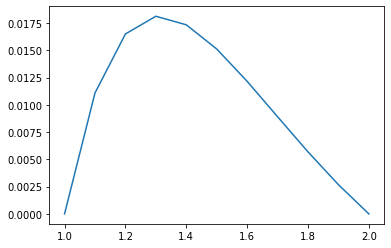

In [728]:
plt.plot(x, np.linalg.inv(A) @ b - g)
plt.show()

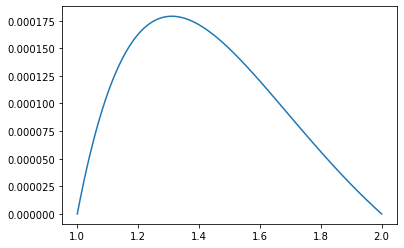

In [733]:
plt.plot(x, np.linalg.inv(A) @ b - g)
plt.show()

In [734]:
###Question 3
def func_iii(y):
    return sqrt(2 / pi) * (((1 / y) - 1) ** 4) * np.exp(-0.5 * ((1 / y) - 1) ** 2) / (y ** 2)

def func_ii(y):
    return np.exp(-((1 / y) - 1) ** 2) / (y ** 2)

def func_i(y):
    return 2 * ((2 * y + 1) ** 2)

In [735]:
func_iii(np.random.uniform(0, 1, 5000000)).mean()

2.998562066196553

In [736]:
(np.random.normal(0, 1, 5000000) ** 4).mean()

3.0001254173867857

In [740]:
from scipy.stats import kurtosis
kurtosis(np.random.normal(0, 1, 5000000), fisher=False)

2.9988617211037165

In [419]:
func_ii(np.random.uniform(0, 1, 5000000)).mean()

0.886642083815656

In [421]:
sqrt(pi) / 2

0.8862269254527579

In [423]:
func_i(np.random.uniform(0, 1, 5000000)).mean()

8.665223392141836

In [424]:
26 /3 

8.666666666666666

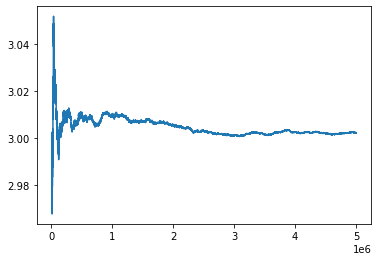

In [746]:
N = 5000000
plt.plot(np.arange(1, N + 1)[10000:],  (func_iii(np.random.uniform(0, 1, N)).cumsum() / np.arange(1, N + 1))[10000:])
plt.show()

In [747]:
%timeit func_iii(np.random.uniform(0, 1, 1000)).mean()
%timeit (np.random.normal(0, 1, 1000) ** 4).mean()
%timeit kurtosis(np.random.normal(0, 1, 1000), fisher=False)

73 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
71.4 µs ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
204 µs ± 7.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [792]:
np.log(GBM(1, 252, 0.05, 0.2, 100, 1000000).T[-1,:]/S_0).std()

0.19987503257763004